In [1]:
install.packages("httpgd")

also installing the dependencies ‘systemfonts’, ‘unigd’, ‘AsioHeaders’


Warning message in install.packages("httpgd"):
“installation of package ‘systemfonts’ had non-zero exit status”
Warning message in install.packages("httpgd"):
“installation of package ‘unigd’ had non-zero exit status”
Warning message in install.packages("httpgd"):
“installation of package ‘httpgd’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.5.1     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ stringr 1.5.1
✔ readr   2.1.5     ✔ forcats 1.0.0
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
raw_counts <- read_tsv('/data/classes/2025/spring/biol443/course_files/rnaseq_data/counts.tsv', comment = '#')
norm_counts <- read_csv('/data/classes/2025/spring/biol443/course_files/rnaseq_data/deseq_norm_counts.csv')
degs <- read_csv('/data/classes/2025/spring/biol443/course_files/rnaseq_data/deseq_results.csv')

Rows: 9920 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): Geneid, Chr, Start, End, Strand
dbl (9): Length, dedup/star/Int-01_S42_L005.bam:Int-01_S42_L005, dedup/star/...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8556 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): gene_id
dbl (8): Int-01_S42_L005, Int-02_S43_L005, Int-03_S44_L005, Int-04_S45_L005,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8556 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): gene_id
dbl (6): baseMean, log2FoldChange, lfcSE, stat, pvalue, padj

ℹ Use `spec()` to retrieve the full c

In [7]:
norm_counts_long <- norm_counts |>
    pivot_longer(-gene_id, names_to = 'sample', values_to = 'norm_count') |>
    mutate(sample = str_remove(sample, "_S[0-9]{2}_L005")) |>
    separate(sample, c('sample', 'replicate'), "-")

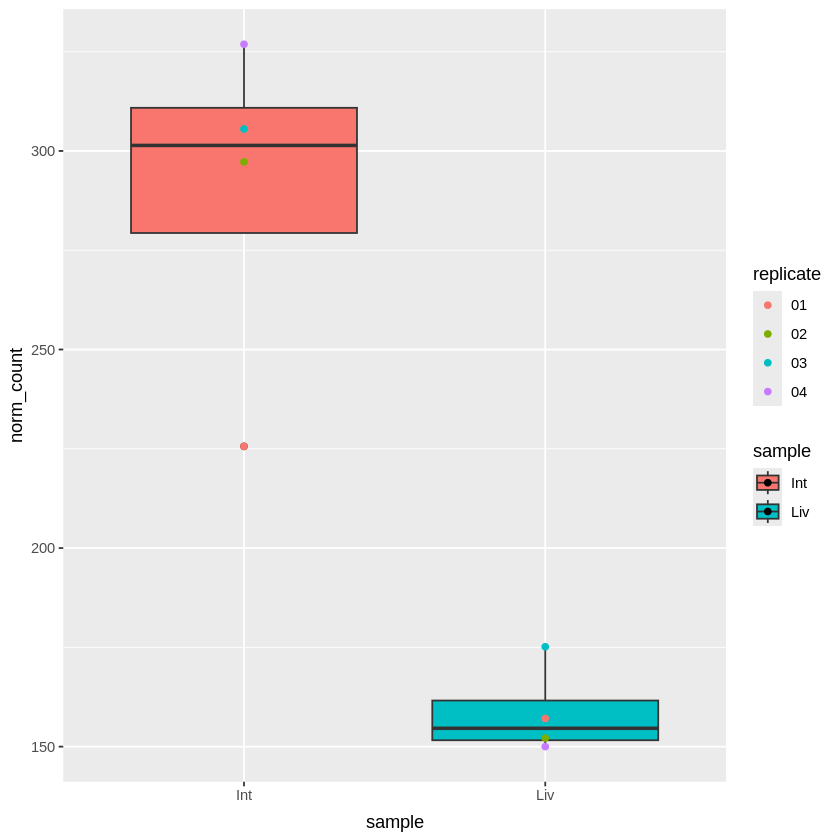

In [21]:
norm_counts_long |>
    filter(gene_id == 'Smp_000100') |>
    ggplot(aes(x = sample, y = norm_count, fill = sample)) +
    geom_boxplot() +
    geom_point(aes(color = replicate))

In [22]:
degs

gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Smp_000020,122.645600,-0.03540783,0.2431189,-0.1456400,8.842056e-01,0.980044560
Smp_000030,756.764860,-0.11168885,0.1411658,-0.7911894,4.288335e-01,0.877600035
Smp_000040,166.829741,0.12775589,0.1985375,0.6434849,5.199095e-01,0.908268294
Smp_000050,30.394625,0.46513054,0.3335515,1.3944791,1.631730e-01,0.699636327
Smp_000070,324.809162,-0.17477709,0.2462724,-0.7096900,4.778964e-01,0.889697366
Smp_000080,22.841662,-0.11826392,0.6054554,-0.1953305,8.451342e-01,0.972978266
Smp_000100,223.702489,-0.87113535,0.1928393,-4.5174168,6.259862e-06,0.002016677
Smp_000110,50.351553,0.13063975,0.2460517,0.5309442,5.954574e-01,0.926252241
Smp_000130,85.416146,-0.04232392,0.2052178,-0.2062391,8.366042e-01,0.970808253
